In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Étape 1 - Chargement des données et configuration

Je commence par charger le fichier `fifaworldcup_cleaned.csv` contenant les données nettoyées. 
J'affiche aussi quelques lignes et configure pandas pour bien voir toutes les colonnes.


In [3]:
# Chargement du fichier CSV
df = pd.read_csv('fifaworldcup_cleaned.csv')

In [4]:
# Configuration de pandas pour afficher toutes les colonnes du DataFrame
pd.set_option('display.max_columns', None)

In [5]:
# Affiche aléatoirement 5 lignes du DataFrame pour avoir un aperçu des données
df.sample(5)

,Tournament,Stage Name,Group Name,Date,Time,Stadium,City,Country,HomeTeam,HomeCode,AwayTeam,AwayCode,Score,HomeScore,AwayScore,HomeMargin,AwayMargin,Extra Time,Penalty,PenaltyScore,HomePenalty,AwayPenalty,Result,Home Team Win,Away Team Win,Draw,Year,TotalGoals,Winner
627,2002 FIFA World Cup,group stage,Group D,2002-06-14,20:30,Incheon Munhak Stadium,Incheon,South Korea,Portugal,PRT,South Korea,KOR,01,0,1,-1,1,0,0,0-0,0,0,away team win,0,1,0,2002,1,South Korea
580,2002 FIFA World Cup,group stage,Group A,2002-05-31,20:30,Seoul World Cup Stadium,Seoul,South Korea,France,FRA,Senegal,SEN,01,0,1,-1,1,0,0,0-0,0,0,away team win,0,1,0,2002,1,Senegal
460,1990 FIFA World Cup,semi-finals,not applicable,1990-07-03,20:00,Stadio San Paolo,Naples,Italy,Argentina,ARG,Italy,ITA,11,1,1,0,0,1,1,43,4,3,home team win,1,0,0,1990,2,Argentina
148,1962 FIFA World Cup,group stage,Group 1,1962-06-03,15:00,Estadio Carlos Dittborn,Arica,Chile,Russia,SUN,Colombia,COL,44,4,4,0,0,0,0,0-0,0,0,draw,0,0,1,1962,8,draw
912,2022 FIFA World Cup,group stage,Group G,2022-11-24,13:00,Al Janoub Stadium,Al Wakrah,Qatar,Switzerland,CHE,Cameroon,CMR,10,1,0,1,-1,0,0,0-0,0,0,home team win,1,0,0,2022,1,Switzerland


## Étape 2 - Nombre de victoires par pays

Dans cette section, j'analyse le palmarès des nations ayant remporté la Coupe du Monde.
Je filtre les matchs de finale et identifie les pays vainqueurs.

Cela me permet de générer un graphique sur les pays les plus titrés de l'histoire du tournoi.


In [6]:
# Filtrer les matchs de finale
finals = df[df["Stage Name"] == "final"]

In [7]:
# Compte les victoires par pays
winner_counts = finals["Winner"].value_counts()
print(winner_counts)

Winner
Brazil       5
Italy        4
Germany      4
Argentina    3
France       2
Uruguay      1
England      1
Spain        1
Name: count, dtype: int64


Le graphique ci-dessous représente le nombre de fois où chaque pays a remporté une finale de Coupe du Monde.  
Cela permet de visualiser les nations dominantes à travers l’histoire du tournoi.

/var/folders/rn/1ty5r8f972lg3qt77gbc3r180000gn/T/ipykernel_69798/3195013416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winner_counts.values, y=winner_counts.index, palette="crest")


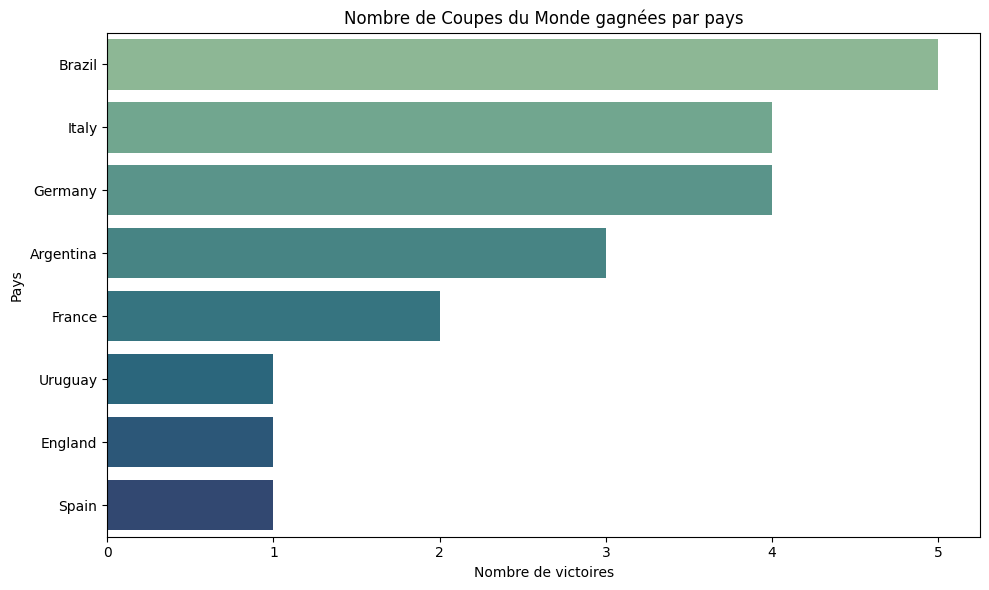

In [8]:
# Graphique Nombres de coupe du monde gagnées par pays
plt.figure(figsize=(10, 6))
sns.barplot(x=winner_counts.values, y=winner_counts.index, palette="crest")
plt.title("Nombre de Coupes du Monde gagnées par pays")
plt.xlabel("Nombre de victoires")
plt.ylabel("Pays")
plt.tight_layout()
plt.show()

## Étape 3 - Top 10 des nations avec le plus de victoires

Ici, je calcule quelles équipes ont remporté le plus de matchs dans l'ensemble du tournoi (phases de groupes + élimination).
Les matchs nuls sont exclus pour ne conserver que les victoires claires.

Ce graphique est utile pour voir la régularité des équipes sur l'ensemble des éditions.


In [9]:
# Filtrer les matchs gagnés uniquement (on enlève les matchs nuls)(!= --> différent de)
wins_only = df[df['Winner'] != 'draw']

# Compter le nombre de victoires par équipe
top10_winners = wins_only['Winner'].value_counts().head(10)

# Afficher dans le terminal
print(top10_winners)

Winner
Brazil         79
Germany        72
Argentina      53
Italy          46
France         41
England        33
Spain          32
Netherlands    31
Uruguay        26
Belgium        22
Name: count, dtype: int64


Ce graphique représente les 10 nations ayant remporté le plus de matchs depuis 1930.

/var/folders/rn/1ty5r8f972lg3qt77gbc3r180000gn/T/ipykernel_69798/1598751198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top10_winners.values, y=top10_winners.index, palette="magma")


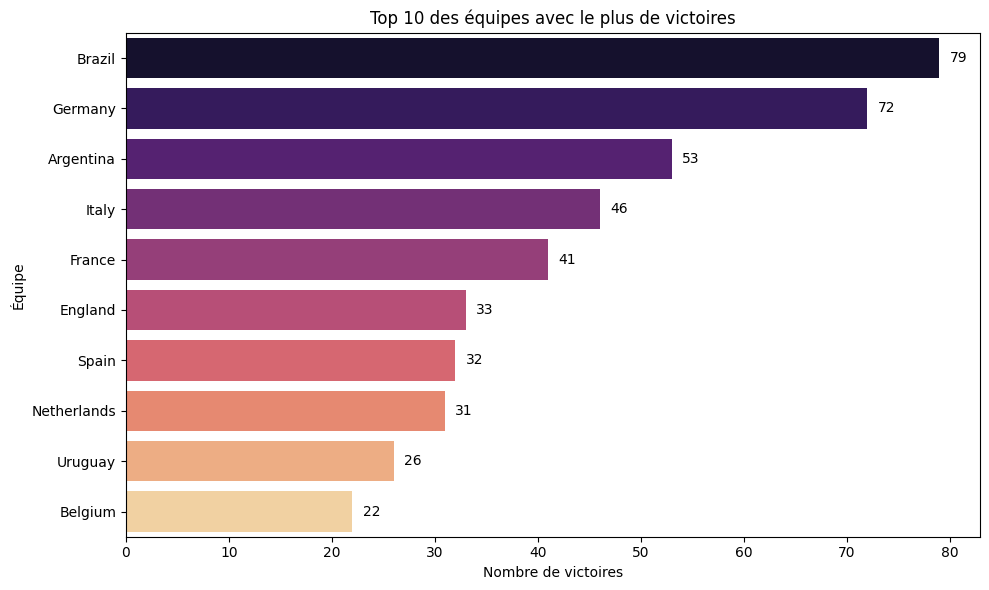

In [10]:
# Crée une nouvelle figure avec une taille définie (10 pouces de large, 6 de haut)
plt.figure(figsize=(10, 6))

# Crée un graphique en barres horizontales avec la palette "magma"
# x = nombre de victoires, y = noms des équipes
ax = sns.barplot(x=top10_winners.values, y=top10_winners.index, palette="magma")

# Ajouter les valeurs numériques à droite de chaque barre
for i, value in enumerate(top10_winners.values):
    ax.text(value + 1, i, str(value), va='center')  # +1 décale le texte à droite de la barre

# Ajouter un titre et les labels des axes
plt.title("Top 10 des équipes avec le plus de victoires")
plt.xlabel("Nombre de victoires")
plt.ylabel("Équipe")

# Ajuster l'espacement pour que tout soit bien affiché
plt.tight_layout()

# Afficher le graphique
plt.show()

## Étape 4 - Finales jouées vs gagnées

Je compare le nombre de finales disputées avec celles remportées par chaque nation.
Cela permet de distinguer les nations qui réussissent à conclure une finale de celles qui chutent au dernier moment.

J'affiche ensuite ces résultats dans un graphique croisant les deux indicateurs.


In [11]:
# Filtrer uniquement les matchs correspondant à la phase "Finale" (on met en minuscule pour éviter les erreurs de casse)
finals = df[df['Stage Name'].str.lower() == 'final']

# Rassembler tous les pays ayant participé à une finale (équipes à domicile et à l'extérieur)
finalists = pd.concat([finals['HomeTeam'], finals['AwayTeam']])

# Compter le nombre de participations à une finale pour chaque pays
finals_played = finalists.value_counts()

# Afficher les 10 pays ayant disputé le plus de finales
print(finals_played.head(10))

Germany           8
Italy             6
Brazil            6
Argentina         6
France            4
Netherlands       3
Czech Republic    2
Hungary           2
Uruguay           1
England           1
Name: count, dtype: int64


In [12]:
# Compter combien de fois chaque pays a gagné une finale
final_wins = finals['Winner'].value_counts()

# Créer un DataFrame récapitulatif avec :
# - le nombre de finales jouées (finals_played)
# - le nombre de finales gagnées (final_wins)
final_summary = pd.DataFrame({
    'Finales jouées': finals_played,
    'Finales gagnées': final_wins
})

# Remplacer les valeurs manquantes (NaN) par 0, puis convertir les valeurs en entiers
final_summary = final_summary.fillna(0).astype(int)

# Trier les résultats par nombre de finales jouées (ordre décroissant)
final_summary = final_summary.sort_values(by='Finales jouées', ascending=False)

# Afficher les 10 premières lignes du tableau
print(final_summary.head(10))

                Finales jouées  Finales gagnées
Germany                      8                4
Argentina                    6                3
Brazil                       6                5
Italy                        6                4
France                       4                2
Netherlands                  3                0
Czech Republic               2                0
Hungary                      2                0
Croatia                      1                0
England                      1                1


Le graphique ci-dessous met en parallèle le nombre de finales disputées et le nombre de finales remportées par les nations les plus présentes à ce stade du tournoi.

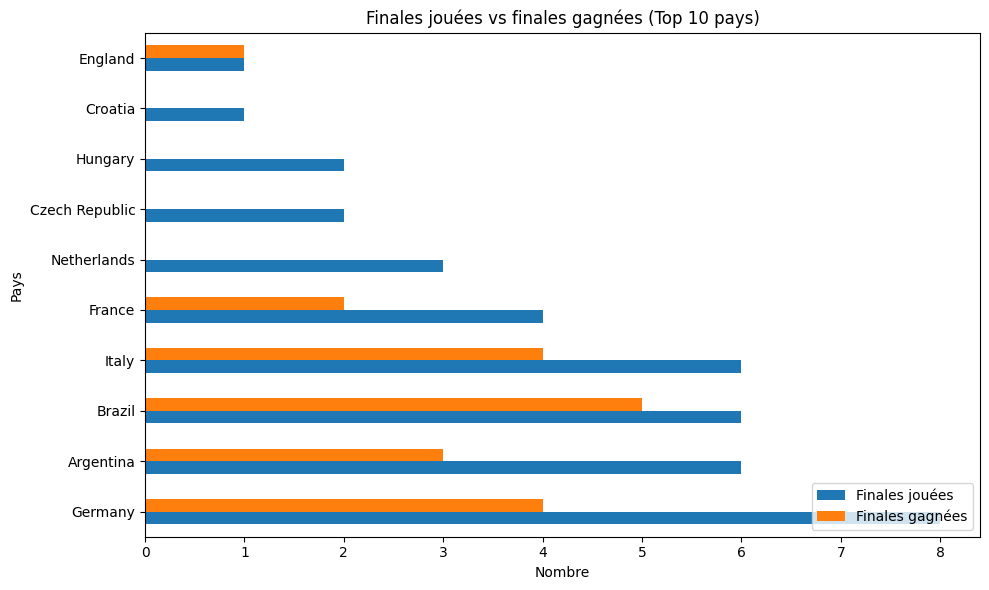

In [13]:
# Afficher un graphique en barres horizontales comparant le nombre de finales jouées et gagnées
# pour les 10 pays ayant disputé le plus de finales
final_summary.head(10).plot(kind='barh', figsize=(10, 6))

# Ajouter un titre et les étiquettes des axes
plt.title('Finales jouées vs finales gagnées (Top 10 pays)')
plt.xlabel('Nombre')
plt.ylabel('Pays')

# Afficher la légende en bas à droite du graphique
plt.legend(loc='lower right')

# Ajuster automatiquement les marges pour une meilleure présentation
plt.tight_layout()

# Afficher le graphique
plt.show()

## Étape 5 - Évolution du format de la Coupe du Monde

### 5.1 Nombre de matchs par édition
Je compte combien de matchs ont été joués à chaque Coupe du Monde. Cela donne une vision de l'évolution du format du tournoi (nombre d'équipes, phase de poules, etc).


In [14]:
# Compter le nombre de matchs joués chaque année de Coupe du Monde
matches_per_year = df['Year'].value_counts().sort_index()

# Afficher le nombre de matchs par édition dans l'ordre chronologique
print(matches_per_year)

Year
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
2022    64
Name: count, dtype: int64


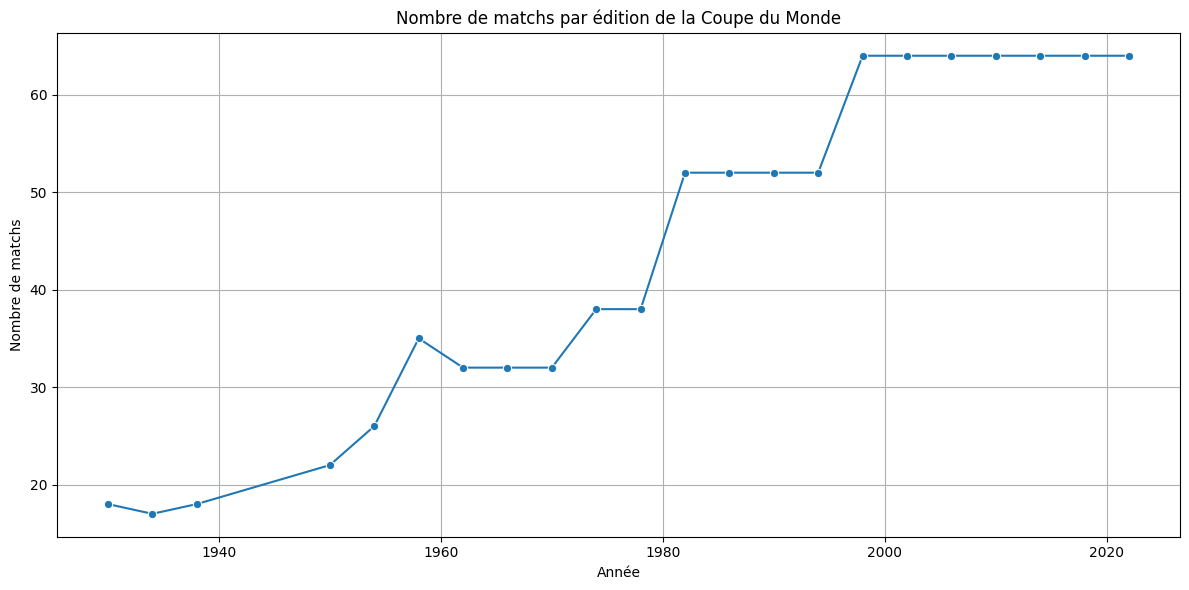

In [15]:
# Créer une figure avec une taille de 12 pouces de large sur 6 de haut
plt.figure(figsize=(12, 6))

# Tracer une courbe représentant le nombre de matchs par édition (avec des marqueurs ronds sur les points)
sns.lineplot(x=matches_per_year.index, y=matches_per_year.values, marker='o')

# Ajouter un titre au graphique
plt.title("Nombre de matchs par édition de la Coupe du Monde")

# Étiquettes des axes
plt.xlabel("Année")
plt.ylabel("Nombre de matchs")

# Afficher une grille sur le fond du graphique
plt.grid(True)

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

### 5.2 Nombre de buts par édition
Je calcule le total de buts marqués pour chaque édition. Cela montre l'intensité offensive des différentes époques.


In [16]:
# Calculer le nombre total de buts marqués pour chaque édition de la Coupe du Monde
# en regroupant les données par année et en faisant la somme de la colonne 'TotalGoals'
goals_per_year = df.groupby('Year')['TotalGoals'].sum()

# Afficher le total de buts par édition
print(goals_per_year)

Year
1930     70
1934     70
1938     84
1950     88
1954    140
1958    126
1962     89
1966     89
1970     95
1974     97
1978    102
1982    146
1986    132
1990    115
1994    141
1998    171
2002    161
2006    147
2010    145
2014    171
2018    169
2022    172
Name: TotalGoals, dtype: int64


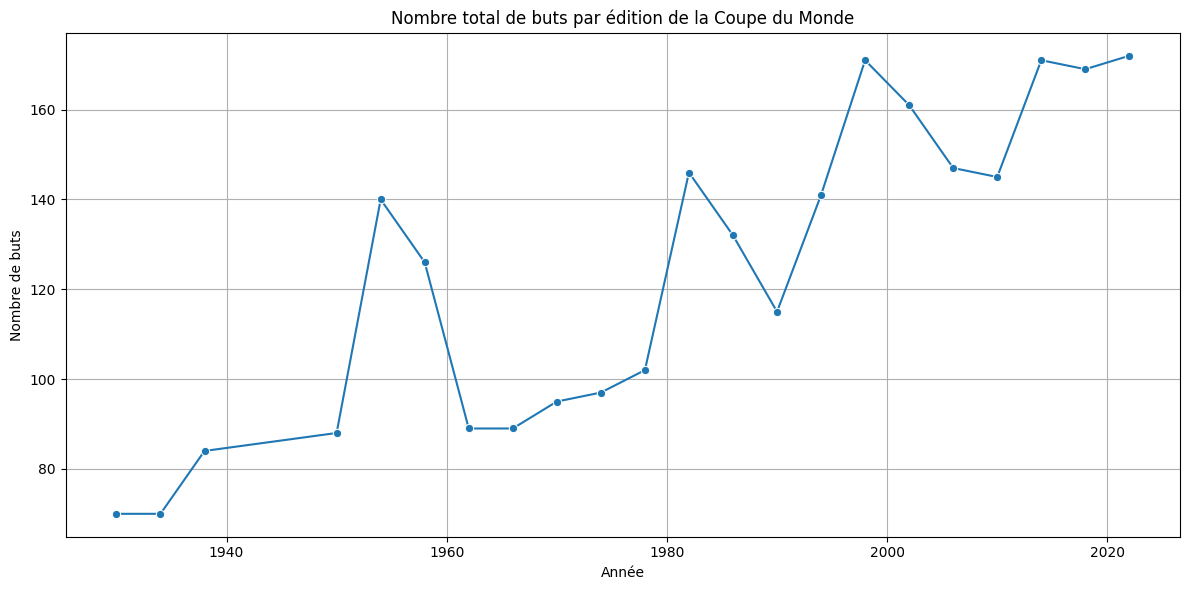

In [17]:
# Créer une figure avec une taille de 12x6 pouces
plt.figure(figsize=(12, 6))

# Tracer une courbe représentant le total de buts marqués à chaque édition de la Coupe du Monde
sns.lineplot(x=goals_per_year.index, y=goals_per_year.values, marker='o')

# Ajouter un titre au graphique
plt.title("Nombre total de buts par édition de la Coupe du Monde")

# Ajouter les étiquettes des axes
plt.xlabel("Année")
plt.ylabel("Nombre de buts")

# Afficher une grille pour faciliter la lecture
plt.grid(True)

# Ajuster automatiquement les marges pour une présentation optimale
plt.tight_layout()

# Afficher le graphique
plt.show()

### 5.3 Moyenne de buts par match
Cette métrique permet de voir si les matchs sont globalement plus offensifs ou défensifs selon les éditions.


Year
1930    3.888889
1934    4.117647
1938    4.666667
1950    4.000000
1954    5.384615
1958    3.600000
1962    2.781250
1966    2.781250
1970    2.968750
1974    2.552632
1978    2.684211
1982    2.807692
1986    2.538462
1990    2.211538
1994    2.711538
1998    2.671875
2002    2.515625
2006    2.296875
2010    2.265625
2014    2.671875
2018    2.640625
2022    2.687500
Name: TotalGoals, dtype: float64


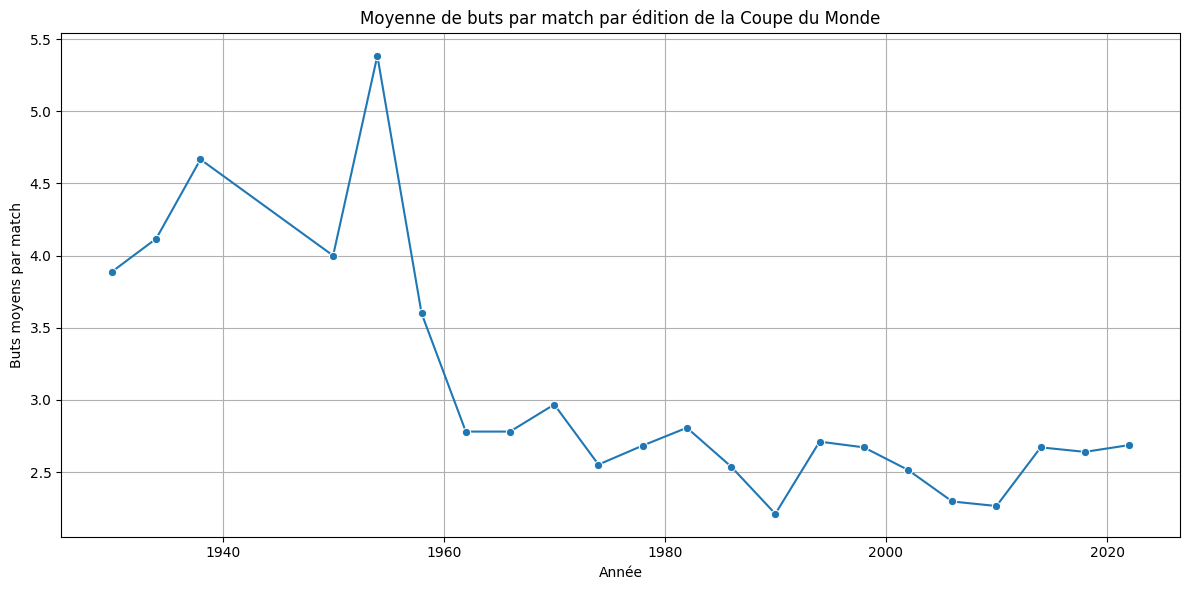

In [18]:
# Calculer la moyenne de buts par match pour chaque édition de la Coupe du Monde
# On regroupe par année et on calcule la moyenne de la colonne 'TotalGoals'
avg_goals_per_edition = df.groupby('Year')['TotalGoals'].mean()

# Afficher la moyenne de buts par match pour chaque édition
print(avg_goals_per_edition)

# Créer une figure pour afficher la courbe
plt.figure(figsize=(12, 6))

# Tracer une ligne représentant la moyenne de buts par match au fil des éditions
sns.lineplot(x=avg_goals_per_edition.index, y=avg_goals_per_edition.values, marker='o')

# Ajouter un titre et les étiquettes des axes
plt.title("Moyenne de buts par match par édition de la Coupe du Monde")
plt.xlabel("Année")
plt.ylabel("Buts moyens par match")

# Ajouter une grille pour faciliter la lecture
plt.grid(True)

# Ajuster l'affichage du graphique pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

## Étape 6 - Analyse de la France

Dans cette partie, je me concentre uniquement sur les performances de la France.

### 6.1 Nombre de matchs joués
Je filtre tous les matchs où la France est présente (domicile ou extérieur).


In [19]:
# Filtrer les lignes du DataFrame où la France est soit l'équipe à domicile, soit l'équipe à l'extérieur
france_matches = df[(df['HomeTeam'] == 'France') | (df['AwayTeam'] == 'France')]

# Afficher le nombre total de matchs joués par la France dans la Coupe du Monde
print(f"Nombre de matchs joués par la France : {france_matches.shape[0]}")

Nombre de matchs joués par la France : 73


### 6.2 Répartition victoires / nuls / défaites
Je compte le nombre de matchs remportés, perdus ou nuls par l'équipe de France, et je les représente en camembert.

In [20]:
# Filtrer les matchs gagnés par la France
france_wins = france_matches[france_matches['Winner'] == 'France']

# Filtrer les matchs nuls (égalité)
france_draws = france_matches[france_matches['Winner'] == 'draw']

# Filtrer les matchs perdus par la France (ni victoire ni nul)
france_losses = france_matches[
    (france_matches['Winner'] != 'France') & (france_matches['Winner'] != 'draw')
]

# Afficher le nombre de victoires, de matchs nuls et de défaites
print("Victoires :", len(france_wins))
print("Nuls :", len(france_draws))
print("Défaites :", len(france_losses))

Victoires : 41
Nuls : 9
Défaites : 23


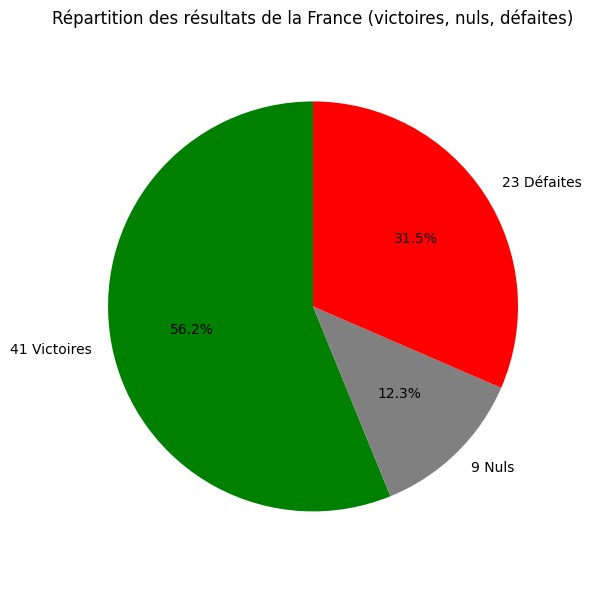

In [21]:
# Préparation des données : dictionnaire contenant les résultats de la France
# Les clés incluent directement le texte affiché, les valeurs sont calculées précédemment
results = {
    '41 Victoires': len(france_wins),
    '9 Nuls': len(france_draws),
    '23 Défaites': len(france_losses)
}

# Créer une figure carrée de taille 6x6 pouces
plt.figure(figsize=(6, 6))

# Tracer un graphique en camembert avec :
# - les valeurs du dictionnaire
# - les étiquettes (labels)
# - les pourcentages affichés sur chaque part
# - des couleurs personnalisées : vert, gris et rouge
# - un angle de départ à 90° pour aligner la première part en haut
plt.pie(results.values(), labels=results.keys(), autopct='%1.1f%%',
        colors=['green', 'gray', 'red'], startangle=90)

# Ajouter un titre au graphique
plt.title("Répartition des résultats de la France (victoires, nuls, défaites)")

# Assurer que le camembert est bien circulaire
plt.axis('equal')

# Ajuster les marges pour une bonne présentation
plt.tight_layout()

# Afficher le graphique
plt.show()

### 6.3 Victoires par année
Je trace un graphique pour voir les éditions où la France a eu le plus de victoires.


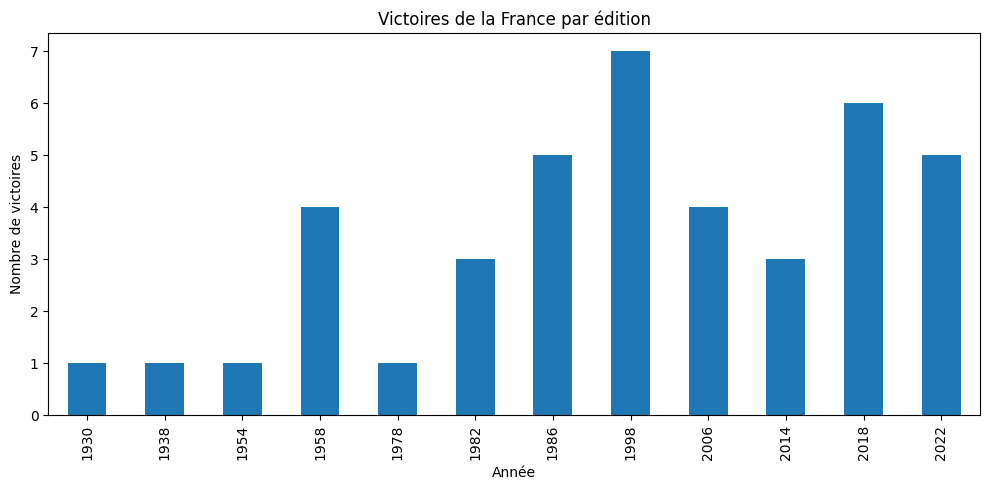

In [22]:
# Compter le nombre de victoires de la France pour chaque année de Coupe du Monde
# On trie les années dans l'ordre chronologique pour un affichage clair
france_wins_by_year = france_wins['Year'].value_counts().sort_index()

# Tracer un graphique en barres représentant les victoires de la France par édition
france_wins_by_year.plot(kind='bar', figsize=(10, 5), title="Victoires de la France par édition")

# Ajouter les étiquettes des axes
plt.xlabel("Année")
plt.ylabel("Nombre de victoires")

# Ajuster l'affichage pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

### 6.4 Bilan buts marqués / encaissés
Je calcule les buts marqués et encaissés par la France sur l'ensemble des éditions.


In [23]:
# Calculer les buts marqués par la France :
# - Si la France joue à domicile, on prend HomeScore
# - Sinon (elle est à l'extérieur), on prend AwayScore
goals_for = france_matches.apply(
    lambda row: row['HomeScore'] if row['HomeTeam'] == 'France' else row['AwayScore'],
    axis=1
)

# Calculer les buts encaissés par la France :
# - Si la France joue à domicile, elle encaisse les buts de l'équipe à l'extérieur (AwayScore)
# - Sinon, elle encaisse les buts de l'équipe à domicile (HomeScore)
goals_against = france_matches.apply(
    lambda row: row['AwayScore'] if row['HomeTeam'] == 'France' else row['HomeScore'],
    axis=1
)

# Afficher le total de buts marqués par la France dans l'histoire de la Coupe du Monde
print("Total buts marqués :", goals_for.sum())

# Afficher le total de buts encaissés par la France
print("Total buts encaissés :", goals_against.sum())

Total buts marqués : 136
Total buts encaissés : 85


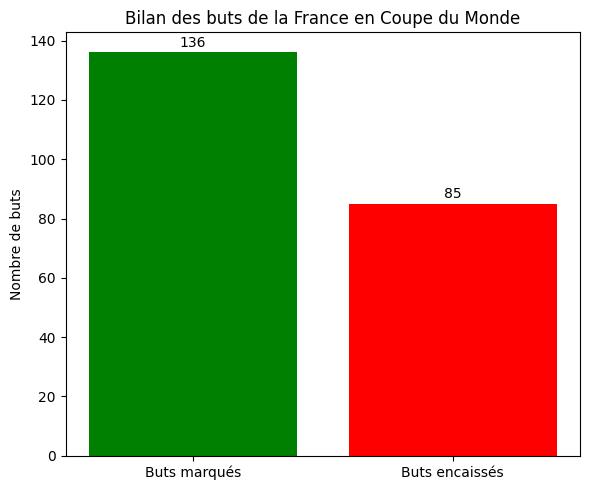

In [28]:
# Création de la série avec les résultats
goal_data = pd.Series([goals_for.sum(), goals_against.sum()], index=["Buts marqués", "Buts encaissés"])

# Création du graphique
plt.figure(figsize=(6, 5))
bars = plt.bar(goal_data.index, goal_data.values, color=['green', 'red'])
plt.title("Bilan des buts de la France en Coupe du Monde")
plt.ylabel("Nombre de buts")

# Ajouter les valeurs au-dessus des barres
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 6.5 Matchs par phase
Je détaille les phases (groupes, quarts, demi...) où la France a joué, avec un graphique pour mieux visualiser son parcours dans le tournoi.

In [24]:
# Filtrer toutes les lignes du DataFrame où la France est soit l'équipe à domicile, soit l'équipe à l'extérieur
# Cela permet de récupérer tous les matchs joués par l'équipe de France dans la Coupe du Monde
france_matches = df[(df['HomeTeam'] == 'France') | (df['AwayTeam'] == 'France')]

In [25]:
# Compter combien de matchs la France a disputés dans chaque phase de la compétition
# (ex : phase de groupes, quart de finale, demi-finale, etc.)
stage_counts = france_matches['Stage Name'].value_counts()

# Afficher le nombre de matchs par phase
print(stage_counts)

Stage Name
group stage           41
round of 16            8
quarter-finals         8
semi-finals            7
final                  4
third-place match      3
second group stage     2
Name: count, dtype: int64


/var/folders/rn/1ty5r8f972lg3qt77gbc3r180000gn/T/ipykernel_69798/3534898061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=stage_counts.values, y=stage_counts.index, palette="Blues_d")


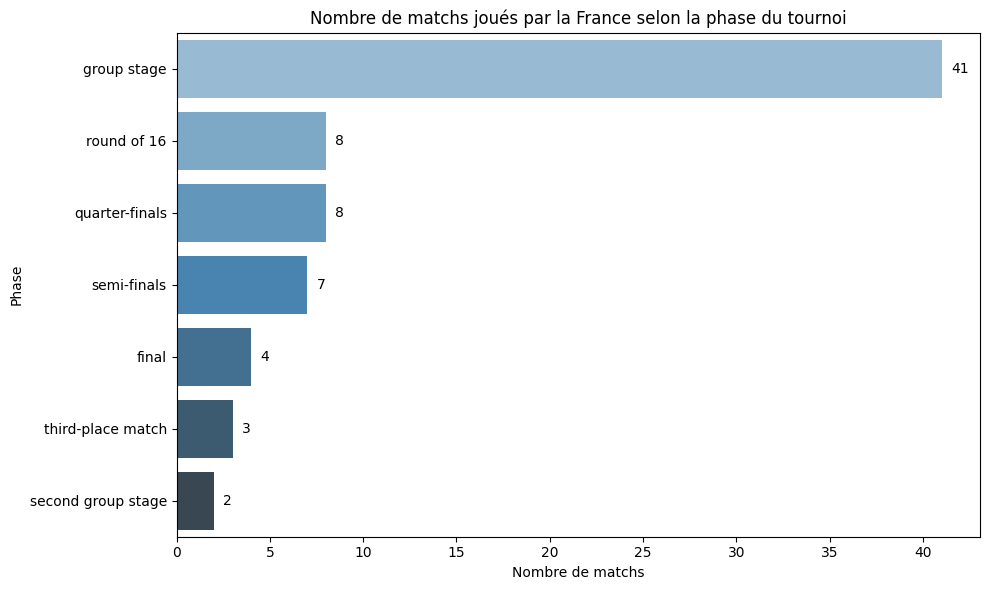

In [26]:
# Créer une figure pour le graphique avec une taille de 10x6 pouces
plt.figure(figsize=(10, 6))

# Tracer un graphique en barres horizontales représentant le nombre de matchs joués par phase
bars = sns.barplot(x=stage_counts.values, y=stage_counts.index, palette="Blues_d")

# Ajouter les valeurs numériques à droite de chaque barre pour plus de lisibilité
for i, value in enumerate(stage_counts.values):
    plt.text(value + 0.5, i, str(value), va='center')  # +0.5 pour décaler légèrement le texte

# Ajouter un titre et les étiquettes des axes
plt.title("Nombre de matchs joués par la France selon la phase du tournoi")
plt.xlabel("Nombre de matchs")
plt.ylabel("Phase")

# Ajuster les marges pour éviter les chevauchements
plt.tight_layout()

# Afficher le graphique
plt.show()

### 6.6 Phase maximale atteinte par la France à chaque Coupe du Monde

J'ai cherché à visualiser pour chaque édition de la Coupe du Monde, jusqu'à quelle phase l'équipe de France est allée.  
Pour cela, j'ai gardé uniquement les phases à élimination directe ainsi que la phase de groupes.

Chaque édition à laquelle la France a participé est représentée par un point sur un graphique en ligne, avec la phase maximale atteinte. Les années sont annotées directement sur le graphique pour plus de clarté.

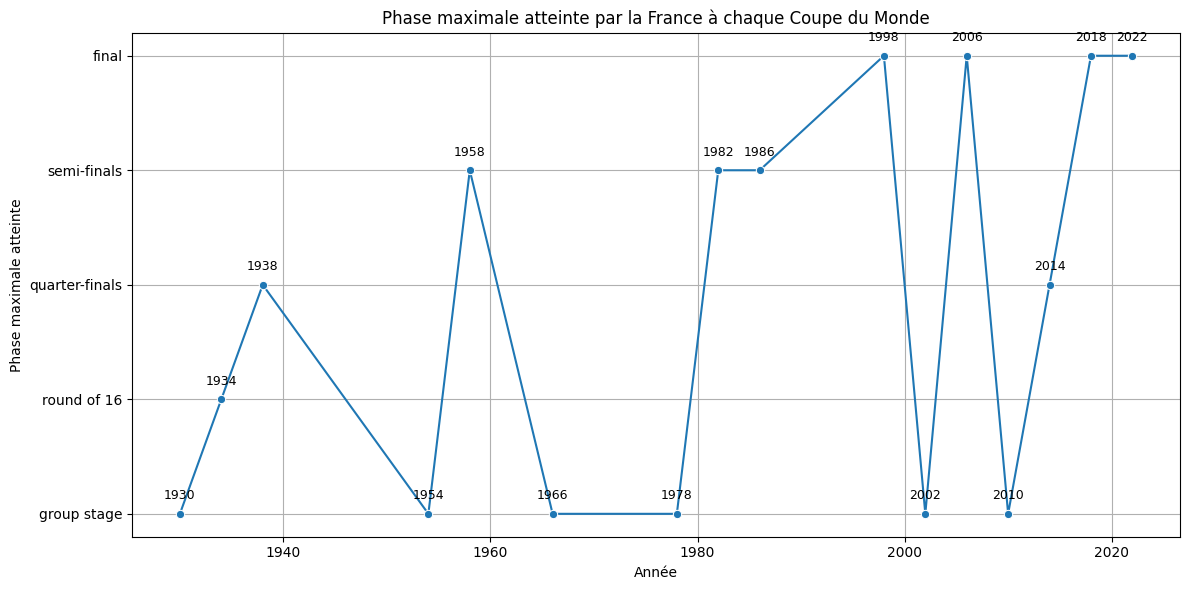

In [27]:
# Liste des phases du tournoi que l'on souhaite inclure dans l'analyse
phases_avec_group = [
    "group stage",
    "round of 16",
    "quarter-finals",
    "semi-finals",
    "final"
]

# Dictionnaire pour attribuer un ordre numérique à chaque phase
# Cela permettra de trier et tracer les phases dans le bon ordre
ordre_phases = {
    "group stage": 0,
    "round of 16": 1,
    "quarter-finals": 2,
    "semi-finals": 3,
    "final": 4
}

# Filtrer tous les matchs où la France a joué dans les phases sélectionnées
france_tous_matchs = df[
    ((df['HomeTeam'] == 'France') | (df['AwayTeam'] == 'France')) &
    (df['Stage Name'].isin(phases_avec_group))
].copy()

# Extraire l'année à partir de la date des matchs
france_tous_matchs['Year'] = pd.to_datetime(france_tous_matchs['Date']).dt.year

# Convertir chaque phase en valeur numérique pour faciliter le tri et la visualisation
france_tous_matchs['Phase_Numerique'] = france_tous_matchs['Stage Name'].map(ordre_phases)

# Pour chaque année, récupérer la phase la plus avancée atteinte par la France
phases_par_annee = france_tous_matchs.groupby('Year')['Phase_Numerique'].max()

# Retransformer les scores numériques en noms de phases pour l'affichage
phases_par_annee_label = phases_par_annee.map({v: k for k, v in ordre_phases.items()})

# ---- VISUALISATION ----
plt.figure(figsize=(12, 6))

# Tracer l'évolution des performances de la France au fil des éditions
sns.lineplot(x=phases_par_annee.index, y=phases_par_annee.values, marker='o')

# Annoter chaque point avec l'année de la Coupe du Monde correspondante
for year, value in phases_par_annee.items():
    plt.text(year, value + 0.1, str(year), ha='center', va='bottom', fontsize=9)

# Remplacer les ticks numériques par les noms de phase pour plus de lisibilité
plt.yticks(list(ordre_phases.values()), list(ordre_phases.keys()))

# Ajouter les titres et mise en forme
plt.xlabel("Année")
plt.ylabel("Phase maximale atteinte")
plt.title("Phase maximale atteinte par la France à chaque Coupe du Monde")
plt.grid(True)
plt.tight_layout()
plt.show()